In [27]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Import

In [34]:
from core.controller import Controller
from core.population import Population
from core.selector import Elitist, TournamentSelector, SimpleSelector
from typing import Callable, List
import math


from evolvables.planewalker import Position, FunctionEvaluator, FunctionalStepMutator


    

from typing import Any

def analyse_function(objective: Callable[..., float],
                     stepper: Callable[[Position], float],
                     pop_size: int,
                     pop_range: tuple[tuple[float, float], ...],
                     episode_count:int,
                     step_count:int) -> list[list[Position]]:
    list_of_lists_of_bests : list[list[Position]]  = []
    for i in range (0, episode_count):
        list_of_lists_of_bests.append(analyse_episode(objective, stepper, pop_size, pop_range, step_count))
        
    return list_of_lists_of_bests

def analyse_episode(objective: Callable[..., float],
                    stepper: Callable[[Position], float],
                    pop_size: int,
                    pop_range: tuple[tuple[float, float], ...],
                    step_count:int) -> List[Position]:
    init_pop = Population[Position]()
    for i in range (pop_size):
        init_pop.append(Position.create_random(pop_range))

    evaluator = FunctionEvaluator(objective)
    parentselector = Elitist(TournamentSelector[Position](1, 10))
    child = SimpleSelector[Position](1, pop_size)
    variator = FunctionalStepMutator(10, stepper)

    ctrl = Controller[Position](
        population = init_pop,
        evaluator = evaluator,
        variator = variator,
        survivor_selector = parentselector,
        parent_selector = child
    )

    bests: list[Position] = []
    for ii in range(0, step_count):
        ctrl.step()
        bests.append(ctrl.population[0].copy())
    return bests

def average_scores(pops1)-> List[float]:
    average_scores: List[float] = []
    for i in range (len(pops1[0])):
        average_score = sum([pops[i].score for pops in pops1])/len(pops1)
        average_scores.append(average_score)
    return average_scores

def himmelblau(x:float, y:float)-> float:
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

pops1 = analyse_function(himmelblau, lambda x : 1, pop_size = 1, pop_range = ((-5,5), (-5,5)), episode_count = 5, step_count = 50)
avg1 = average_scores(pops1)

pops2 = analyse_function(himmelblau, lambda x : 2, pop_size = 1, pop_range = ((-5,5), (-5,5)), episode_count = 5, step_count = 50)
avg2 = average_scores(pops2)

pops05 = analyse_function(himmelblau, lambda x : 0.5, pop_size = 1, pop_range = ((-5,5), (-5,5)), episode_count = 5, step_count = 50)
avg05 = average_scores(pops05)

popsprop = analyse_function(himmelblau, lambda x : math.log(abs(x.score)/5), pop_size = 1, pop_range = ((-5,5), (-5,5)), episode_count = 5, step_count = 50)
avgprop = average_scores(popsprop)



DBG:  Elitism: best score is -54.22914131190206 
DBG:  Population progress: [1] -> (...)>PAR>(1) -> [(1)~1] -> (1) VAR (10) -> [10] -> SUR -> [11], gen 1. Best score is now -54.22914131190206 
WRN:  Best solution is: (-3.2155845216966457, -1.8106243489387293) 
DBG:  Elitism: best score is -54.22914131190206 
DBG:  Population progress: [11] -> (...)>PAR>(1) -> [(1)~1] -> (1) VAR (10) -> [10] -> SUR -> [11], gen 2. Best score is now -54.22914131190206 
WRN:  Best solution is: (-3.2155845216966457, -1.8106243489387293) 
DBG:  Elitism: best score is -54.22914131190206 
DBG:  Population progress: [11] -> (...)>PAR>(1) -> [(1)~1] -> (1) VAR (10) -> [10] -> SUR -> [11], gen 3. Best score is now -54.22914131190206 
WRN:  Best solution is: (-3.2155845216966457, -1.8106243489387293) 
DBG:  Elitism: best score is -54.22914131190206 
DBG:  Population progress: [11] -> (...)>PAR>(1) -> [(1)~1] -> (1) VAR (10) -> [10] -> SUR -> [11], gen 4. Best score is now -54.22914131190206 
WRN:  Best solution i

Instantiate controller

In [30]:
pops1[0][1].score

-130.31737554606005

Plot everything

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


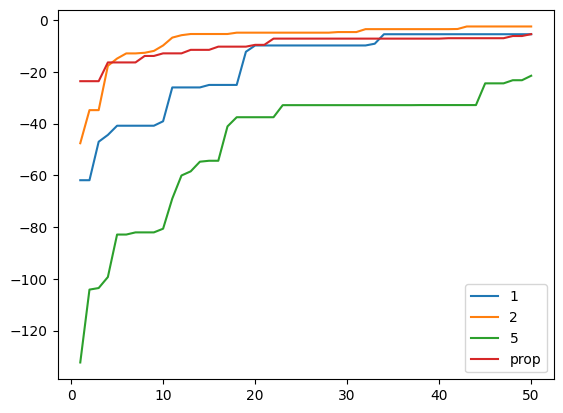

In [41]:
plt.plot(range(1,len(avg1)+1), avg1, label="1")
plt.plot(range(1,len(avg2)+1), avg2, label="2")
plt.plot(range(1,len(avg05)+1), avg05, label="5")
plt.plot(range(1,len(avgprop)+1), avgprop, label="prop")
plt.legend()


n**2
[90]
